<a href="https://colab.research.google.com/github/jenyadev3/Telecom-customer-base-segmentation/blob/main/vkr_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Загрузка данных**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/dataset_telecom.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [4]:
df.describe()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонки в другие страны
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4492.000000
mean,41.894924,505.533577,4.230827,63.899374,70.363778,0.394034
std,13.077254,646.354693,3.005210,62.877394,41.219909,1.171980
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,0.000000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,0.000000
max,70.000000,5142.760000,20.000000,500.000000,160.000000,12.000000


In [5]:
df.head()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
0,24,NaN,2.4,12.0,65.0,5,0,0,5,56,2018-06-17 12:14:35
1,51,287.51,1.7,111.0,109.0,1,44,0,6,1,2021-10-21 15:39:54
2,41,113.70,2.1,41.0,27.0,0,0,0,1,36,2015-03-26 11:26:15
3,35,410.23,5.6,47.0,49.0,0,0,0,11,23,2016-01-04 15:53:20
4,26,537.60,4.8,58.0,77.0,4,0,0,16,29,2017-05-03 13:33:53


Загрузила датасет, посмотрела базовую структуру.


*   Нашла 10 колонок и 4492 записи
*   Видно что есть пропуски в столбцах: Среднемесячный расход                Средняя продолжительность разговоров, Звонков днем за месяц,                  Звонков вечером за месяц (значение non null < 4492)
*   Содержимое некоторых столбцов имеют тип, не похожий на их содержимое: например,столбец "Дата подключения тарифа" имеет тип object, но явно должен быть в формате даты
*   Это был первичный анализ. Обработка данных будет в последующих шагах.





**Шаг 2. Первичная обработка данных**

*Скорректировать типы признаков*

In [6]:
df.info() #смотрю какие типы признаков вообще

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Возраст                                4492 non-null   int64  
 1   Среднемесячный расход                  4468 non-null   float64
 2   Средняя продолжительность разговоров   4475 non-null   float64
 3   Звонков днем за месяц                  4472 non-null   float64
 4   Звонков вечером за месяц               4489 non-null   float64
 5   Звонков ночью за месяц                 4492 non-null   object 
 6   Звонки в другие города                 4492 non-null   object 
 7   Звонки в другие страны                 4492 non-null   int64  
 8   Доля звонков на стационарные телефоны  4492 non-null   object 
 9   Количество SMS за месяц                4492 non-null   object 
 10  Дата подключения тарифа                4492 non-null   object 
dtypes: f

In [7]:
#перевожу время из object
df["Дата подключения тарифа"] = pd.to_datetime(df["Дата подключения тарифа"],errors="coerce")

"Звонков ночью...","Звонки в другие города","Кол-во СМС..." - сейчас это строки, хотя, очевидно, речь идет о кол-ве, значения должны быть числовыми признаками.



In [8]:
cols = ["Звонков ночью за месяц","Звонки в другие города","Количество SMS за месяц","Доля звонков на стационарные телефоны"]
for c in cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Возраст                                4492 non-null   int64         
 1   Среднемесячный расход                  4468 non-null   float64       
 2   Средняя продолжительность разговоров   4475 non-null   float64       
 3   Звонков днем за месяц                  4472 non-null   float64       
 4   Звонков вечером за месяц               4489 non-null   float64       
 5   Звонков ночью за месяц                 4491 non-null   float64       
 6   Звонки в другие города                 4490 non-null   float64       
 7   Звонки в другие страны                 4492 non-null   int64         
 8   Доля звонков на стационарные телефоны  4491 non-null   float64       
 9   Количество SMS за месяц                4491 non-null   float64 

"Доля звонков..." - если доля, то %

In [9]:

df["Доля звонков на стационарные телефоны"] = (
    df["Доля звонков на стационарные телефоны"].astype(float) / 100
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4492 entries, 0 to 4491
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Возраст                                4492 non-null   int64         
 1   Среднемесячный расход                  4468 non-null   float64       
 2   Средняя продолжительность разговоров   4475 non-null   float64       
 3   Звонков днем за месяц                  4472 non-null   float64       
 4   Звонков вечером за месяц               4489 non-null   float64       
 5   Звонков ночью за месяц                 4491 non-null   float64       
 6   Звонки в другие города                 4490 non-null   float64       
 7   Звонки в другие страны                 4492 non-null   int64         
 8   Доля звонков на стационарные телефоны  4491 non-null   float64       
 9   Количество SMS за месяц                4491 non-null   float64 

Проверила типы через df.info()

*   Столбец “Дата подключения тарифа” оказался строковым → перевела в формат даты через pd.to_datetime.
*   Несколько признаков, содержащих числовые значения, были загружены как текст. Привела их к числовому типу (to_numeric) с обработкой ошибок через coerce.
*   Доли перевела в проценты
*   После преобразования повторно проверила структуру df.info(), чтобы убедиться, что типы стали корректными

*Проверить наличие дублирующихся записей*

In [11]:
df.duplicated().sum() #показывает ноль, значит дубликатов нет

np.int64(0)

*Проверить наличие аномальных значений*

*Отрицательные значения*

In [12]:
#вычисляем то что реально числовые колонки

num_cols = df.select_dtypes(include=[np.number]).columns
num_cols


Index(['Возраст', 'Среднемесячный расход',
       'Средняя продолжительность разговоров', 'Звонков днем за месяц',
       'Звонков вечером за месяц', 'Звонков ночью за месяц',
       'Звонки в другие города', 'Звонки в другие страны',
       'Доля звонков на стационарные телефоны', 'Количество SMS за месяц'],
      dtype='object')

In [13]:
(df[num_cols] < 0).any().any()

np.False_

*Максимальные и минимальные значение*

In [14]:
df.describe()

,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа
count,4492.000000,4468.000000,4475.000000,4472.000000,4489.000000,4491.000000,4490.000000,4492.000000,4491.000000,4491.000000,4492
mean,41.894924,505.533577,4.230827,63.899374,70.363778,6.272990,8.658575,0.394034,0.103336,21.245380,2018-07-10 01:04:50.785841664
min,19.000000,3.180000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015-01-01 15:48:33
25%,31.000000,152.490000,2.100000,37.000000,42.000000,0.000000,0.000000,0.000000,0.030000,3.000000,2016-10-21 08:23:49.500000
50%,43.000000,315.510000,3.300000,53.000000,71.000000,1.000000,2.000000,0.000000,0.080000,6.000000,2018-06-21 16:56:24.500000
75%,52.000000,599.840000,5.900000,68.000000,98.000000,5.000000,12.000000,0.000000,0.160000,32.000000,2020-04-04 18:48:26.750000128
max,70.000000,5142.760000,20.000000,500.000000,160.000000,110.000000,88.000000,12.000000,0.600000,179.000000,2021-12-31 14:12:11
std,13.077254,646.354693,3.005210,62.877394,41.219909,14.714668,13.477005,1.171980,0.092229,27.914631,NaN


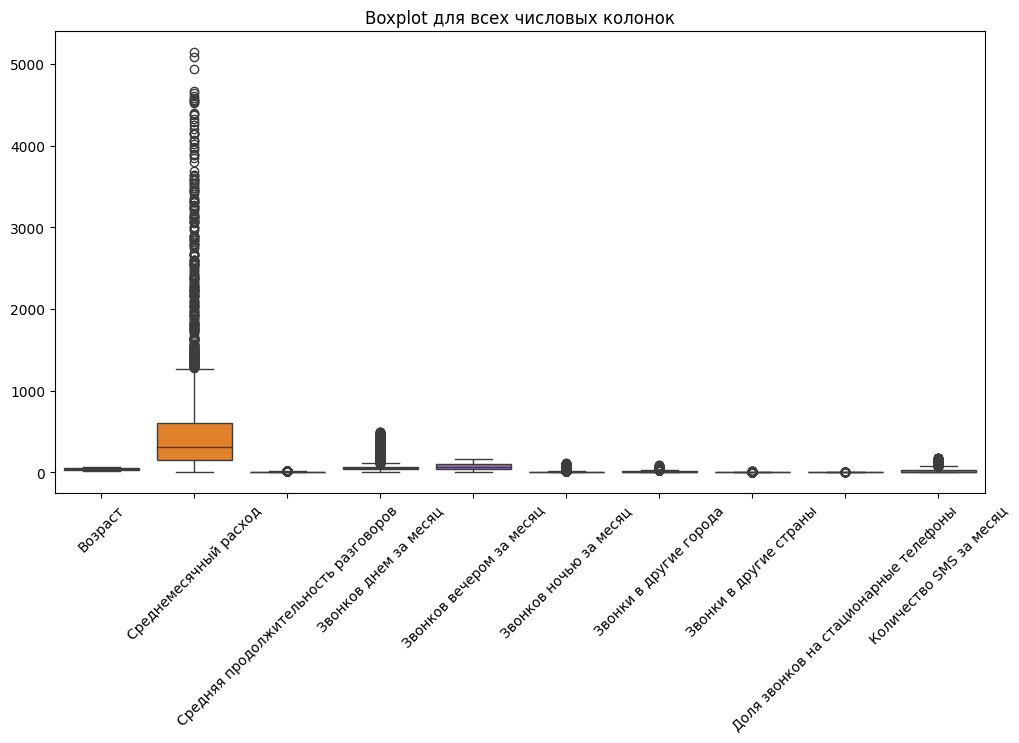

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot для всех числовых колонок")
plt.show()

Что видно на графике:
Коробка очень низкая, усов почти нет.
Значит *возраст* сосредоточен в узком диапазоне — люди примерно одного поколения.
Практически нет выбросов.
*Среднемесячный расход*
Коробка большая, медиана ближе к низу.
Много точек за верхним усом — это *клиенты с очень высоким расходом*.
Именно этот столбец выглядит “странно”. Boxplot чувствителен к выбросам: если есть несколько пользователей с расходом 4000–5000, а остальные 200–500, коробка выглядит маленькой, а точки сильно выступают вверх.У некоторых пользователей расход сильно выше среднего, но это нормальные “крупные” клиенты, а не ошибка.
*Средняя продолжительность* разговоров, звонки днем/вечером/ночью, звонки в другие города/страны, количество SMS
Коробки и медианы маленькие, но есть отдельные точки — это люди с необычно большим количеством звонков/SMS, потенциальные выбросы.
Большинство клиентов концентрируется в низких значениях.
*Доля звонков на стационарные телефоны*
Почти вся коробка внизу, точки редкие — большинство клиентов делает мало звонков на стационарные телефоны, редкие выделяются как точки.


Что считается аномальным
В нашем случае аномалии (выбросы) — это значения за пределами усов (1.5 × IQR).
Boxplot показывает: эти точки реже встречаются, сильно отличаются от большинства.

Есть много точек выше верхнего усa → клиенты с очень высоким расходом.
Это не ошибка, просто редкие, но реальные крупные клиенты.
Звонки днем/вечером/ночью, количество SMS, звонки в другие города
Несколько точек за верхним усом → клиенты с необычно активными звонками или SMS.
Большинство клиентов ниже медианы.
Эти “аномалии” логичны для реальных людей, кто часто звонит.
Доля звонков на стационарные телефоны
Почти все низкие значения, единичные точки — редкие клиенты, которые часто звонят на стационарные телефоны.
Снова: не ошибка, а просто необычное поведение.
Возраст, звонки в другие страны
Выбросов нет — все значения нормальные.

Вывод по аномальным значениям
Аномалии реальные, а не ошибки: это просто редкие или активные клиенты.
На данном этапе не нужно их удалять, потому что это реальные данные.
Можно отметить их, если планируешь отдельный анализ “крупных пользователей” или “очень активных клиентов”.

*Восстановить пропущенные значения*

In [16]:
df.isna().any()

,0
Возраст,False
Среднемесячный расход,True
Средняя продолжительность разговоров,True
Звонков днем за месяц,True
Звонков вечером за месяц,True
Звонков ночью за месяц,True
Звонки в другие города,True
Звонки в другие страны,False
Доля звонков на стационарные телефоны,True
Количество SMS за месяц,True


Колонки, где логично поставить 0 (нет звонков/SMS)

In [17]:
cols_zero = [
    "Звонков днем за месяц",
    "Звонков вечером за месяц",
    "Звонков ночью за месяц",
    "Звонки в другие города",
    "Количество SMS за месяц"
]

df[cols_zero] = df[cols_zero].fillna(0)

Колонки, где пропуск — неизвестное значение, лучше медиана

In [18]:
cols_median = [
    "Доля звонков на стационарные телефоны",
    "Среднемесячный расход",
    "Средняя продолжительность разговоров"
]

for c in cols_median:
  df[c].fillna(df[c].median(),inplace=True)

/tmp/ipython-input-3868025968.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].median(),inplace=True)


In [19]:
print(df.isna().sum())

Возраст                                  0
Среднемесячный расход                    0
Средняя продолжительность разговоров     0
Звонков днем за месяц                    0
Звонков вечером за месяц                 0
Звонков ночью за месяц                   0
Звонки в другие города                   0
Звонки в другие страны                   0
Доля звонков на стационарные телефоны    0
Количество SMS за месяц                  0
Дата подключения тарифа                  0
dtype: int64


**Шаг 3. Добавление новых переменных**


 По значениям признака "Дата подключения тарифа" создаю признаки: Год, Месяц

In [20]:
df['Год'] = df['Дата подключения тарифа'].dt.year
df['Месяц'] = df['Дата подключения тарифа'].dt.month

По значениям признака Возраст ввожу новую переменную "Возрастная категория", принимающую значения "студент", "аспирант", "бизнесмен" и "знаток" по следующую правилу: Возрастная категория = студент,если Возраст 19-24; аспирант,если Возраст 25-33; бизнесмен,если Возраст - 34-56; знаток,если Возраст 57-70

In [21]:
def get_category(age):
    if age <= 24:
        return "Студент"
    elif 25 <= age <= 33:
        return "Аспирант"
    elif 34 <= age <= 56:
        return "Бизнесмен"
    else:
        return "Знаток"

df['Возрастная категория'] = df['Возраст'].apply(get_category)
df.head()


,Возраст,Среднемесячный расход,Средняя продолжительность разговоров,Звонков днем за месяц,Звонков вечером за месяц,Звонков ночью за месяц,Звонки в другие города,Звонки в другие страны,Доля звонков на стационарные телефоны,Количество SMS за месяц,Дата подключения тарифа,Год,Месяц,Возрастная категория
0,24,315.51,2.4,12.0,65.0,5.0,0.0,0,0.05,56.0,2018-06-17 12:14:35,2018,6,Студент
1,51,287.51,1.7,111.0,109.0,1.0,44.0,0,0.06,1.0,2021-10-21 15:39:54,2021,10,Бизнесмен
2,41,113.70,2.1,41.0,27.0,0.0,0.0,0,0.01,36.0,2015-03-26 11:26:15,2015,3,Бизнесмен
3,35,410.23,5.6,47.0,49.0,0.0,0.0,0,0.11,23.0,2016-01-04 15:53:20,2016,1,Бизнесмен
4,26,537.60,4.8,58.0,77.0,4.0,0.0,0,0.16,29.0,2017-05-03 13:33:53,2017,5,Аспирант


In [22]:
df["Дата подключения тарифа"]= df["Дата подключения тарифа"].dt.floor("D")
df_counts = df.groupby("Дата подключения тарифа").size().reset_index(name="Кол-во клиентов в день")
df_counts = df_counts.sort_values("Кол-во клиентов в день",ascending=False)
df_counts.head()

,Дата подключения тарифа,Кол-во клиентов в день
2027,2021-08-13,7
2006,2021-07-19,7
1972,2021-06-11,7
889,2017-12-06,7
29,2015-02-09,7


In [23]:
df['Дата подключения тарифа'] = df_counts['Дата подключения тарифа']
df['Кол-во клиентов в день'] = df_counts['Кол-во клиентов в день']

In [24]:
df_counts_y = df.groupby("Год").size().reset_index(name="Кол-во клиентов в год")
df_counts_y = df_counts_y.sort_values("Кол-во клиентов в год",ascending=False)
df_counts_y.head()


,Год,Кол-во клиентов в год
2,2017,678
3,2018,677
1,2016,652
6,2021,648
5,2020,648


In [26]:
df['Год'] = df_counts_y["Год"]
df['Кол-во клиентов в год'] = df_counts_y['Кол-во клиентов в год']

In [27]:
df_counts_m = df.groupby("Месяц").size().reset_index(name="Кол-во клиентов в месяц")
df_counts_m = df_counts_m.sort_values("Кол-во клиентов в месяц",ascending=False)
df_counts_m

,Месяц,Кол-во клиентов в месяц
7,8,423
4,5,408
5,6,390
8,9,389
3,4,386
9,10,370
1,2,368
0,1,360
10,11,359
6,7,352


In [28]:
df['Месяц'] = df_counts_m['Месяц']
df['Кол-во клиентов в месяц'] = df_counts_m['Кол-во клиентов в месяц']

На основе признака «Дата подключения тарифа» были извлечены дополнительные временные признаки: «Год» и «Месяц».
Это позволит анализировать динамику подключений по времени.
Далее на основе возраста клиентов создан категориальный признак «Возрастная категория».
Категории сформированы по интервальному возрастному принципу:
19–24 — «Студент»
25–33 — «Аспирант»
34–56 — «Бизнесмен»
57–70 — «Знаток»
Данный признак позволит сравнивать поведенческие особенности клиентов разных возрастных групп.
Посчитано сколько раз дата,месяц,год встречаются во фрейме (новые столбцы "Кол-во клиентов в ..."). Пригодится для дальнейших проверок

**Шаг 4. Провести исследовательский анализ данных:**

*Динамика подключения к тарифам (количество клиентов)*

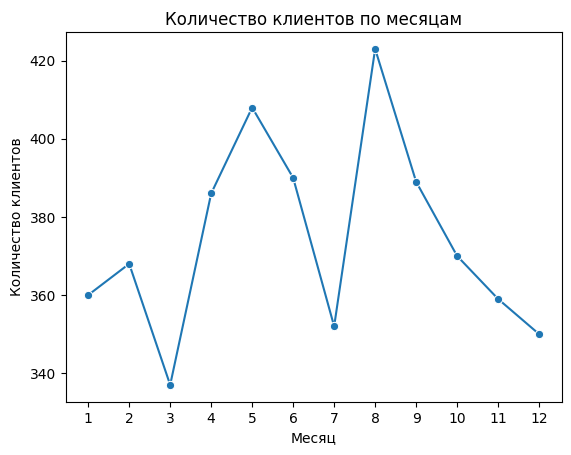

In [29]:
import matplotlib.pyplot as plt

sns.lineplot(data=df, x='Месяц', y='Кол-во клиентов в месяц', marker='o')
plt.xticks(range(1,13))  # чтобы месяцы были 1-12
plt.xlabel('Месяц')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов по месяцам')
plt.show()

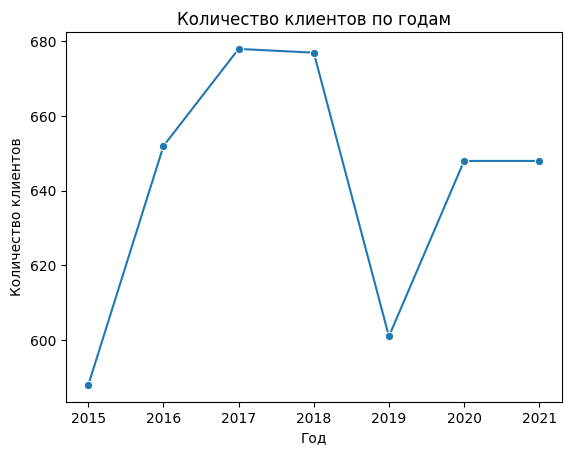

In [30]:
sns.lineplot(data=df, x='Год', y='Кол-во клиентов в год', marker='o')
plt.xlabel('Год')
plt.ylabel('Количество клиентов')
plt.title('Количество клиентов по годам')
plt.show()

Выводы, которые можно из этого сделать: Летние месяцы (июнь, июль, август) популярны — логично, люди летом активнее покупают услуги. Весенние и осенние месяцы тоже высокие — возможно, связано с какими-то акциями или сезонными предложениями. Разница небольшая → клиенты подключаются равномерно, пиков нет огромных, но есть лёгкие «любимые» месяцы. То есть здесь можно писать про тенденцию, а не про жёсткий пик.


По годам
Самый популярный год — 2017,2018 и 2016.
Можно сказать, что в эти годы пришло больше клиентов.
Возможно, в эти годы было расширение, запуск акций или новый продукт.
Разница с другими годами → отражает общую динамику роста или падения.





*Кто тратит больше всего денег на услуги связи*

In [31]:
avg_spent = df.groupby("Возрастная категория")["Среднемесячный расход"].sum().reset_index()

In [32]:
money_spent = avg_spent.sort_values("Среднемесячный расход",ascending=False).head()
money_spent

,Возрастная категория,Среднемесячный расход
1,Бизнесмен,1273922.51
0,Аспирант,580984.70
2,Знаток,291475.76
3,Студент,119913.29


In [33]:
time_spent = df.groupby("Возрастная категория")["Средняя продолжительность разговоров"].sum().reset_index()
time_spent = time_spent.sort_values("Средняя продолжительность разговоров",ascending=False).head()
time_spent

,Возрастная категория,Средняя продолжительность разговоров
1,Бизнесмен,10590.25
0,Аспирант,4466.90
2,Знаток,2458.90
3,Студент,1473.00


У кого больше всего звонков на стац.тел.

In [34]:
landline_spent = df.groupby("Возрастная категория")["Доля звонков на стационарные телефоны"].sum().reset_index()
landline_spent = landline_spent.sort_values("Доля звонков на стационарные телефоны",ascending=False).head()
landline_spent

,Возрастная категория,Доля звонков на стационарные телефоны
1,Бизнесмен,279.39
0,Аспирант,93.62
2,Знаток,70.36
3,Студент,20.79


Кто больше всего отправляет СМС

In [35]:
sms_spent = df.groupby("Возрастная категория")["Количество SMS за месяц"].sum().reset_index()
sms_spent = sms_spent.sort_values("Количество SMS за месяц",ascending=False).head()
sms_spent

,Возрастная категория,Количество SMS за месяц
1,Бизнесмен,36297.0
0,Аспирант,32353.0
3,Студент,24965.0
2,Знаток,1798.0


Общее количество звонков

In [36]:
total_calls = df.groupby("Возрастная категория")[["Звонков днем за месяц",
                                                  "Звонков ночью за месяц",
                                                  "Звонков вечером за месяц",
                                                  "Звонки в другие города",
                                                  "Звонки в другие страны"
                                                  ]].sum().reset_index()

print(total_calls)

  Возрастная категория  Звонков днем за месяц  Звонков ночью за месяц  \
0             Аспирант                66479.0                 11999.0   
1            Бизнесмен               162287.0                  9652.0   
2               Знаток                37268.0                  1376.0   
3              Студент                19724.0                  5145.0   

   Звонков вечером за месяц  Звонки в другие города  Звонки в другие страны  
0                   71059.0                  9309.0                     425  
1                  173426.0                 24497.0                    1036  
2                   35785.0                  4519.0                     252  
3                   35593.0                   552.0                      57  


Бизнесмен совершает больше всего звонков и отправляет больше SMS — это согласуется с тем, что его деятельность предполагает частое общение и связь с другими городами и странами.
Аспирант тратит больше всего на связь и делает больше всего звонков ночью, что может отражать гибкий или нестандартный график общения.
Студент показывает наименьшие значения по большинству показателей, включая среднемесячный расход и количество звонков, что логично с точки зрения ограниченных финансов и меньшей необходимости частого общения.
Знаток меньше всех отправляет SMS и делает ночные звонки, что выделяет его поведение среди остальных категорий.

с помощью диаграмм рассеивания исследуейте зависимости между признаками Среднемесячный расход, Средняя продолжительность разговоров, Звонков днем за месяц, Звонков вечером за месяц, Звонков ночью за месяц, Звонки в другие города, Доля звонков на стационарные телефоны, Количество SMS за месяц.

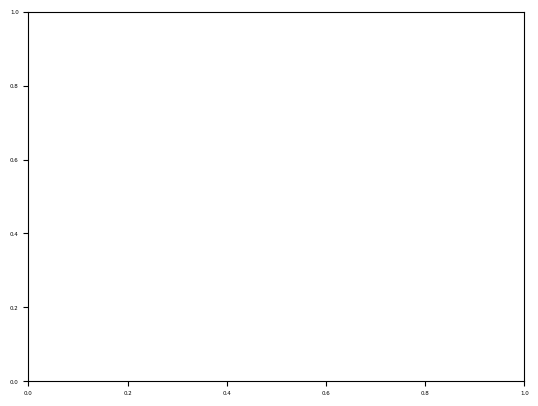

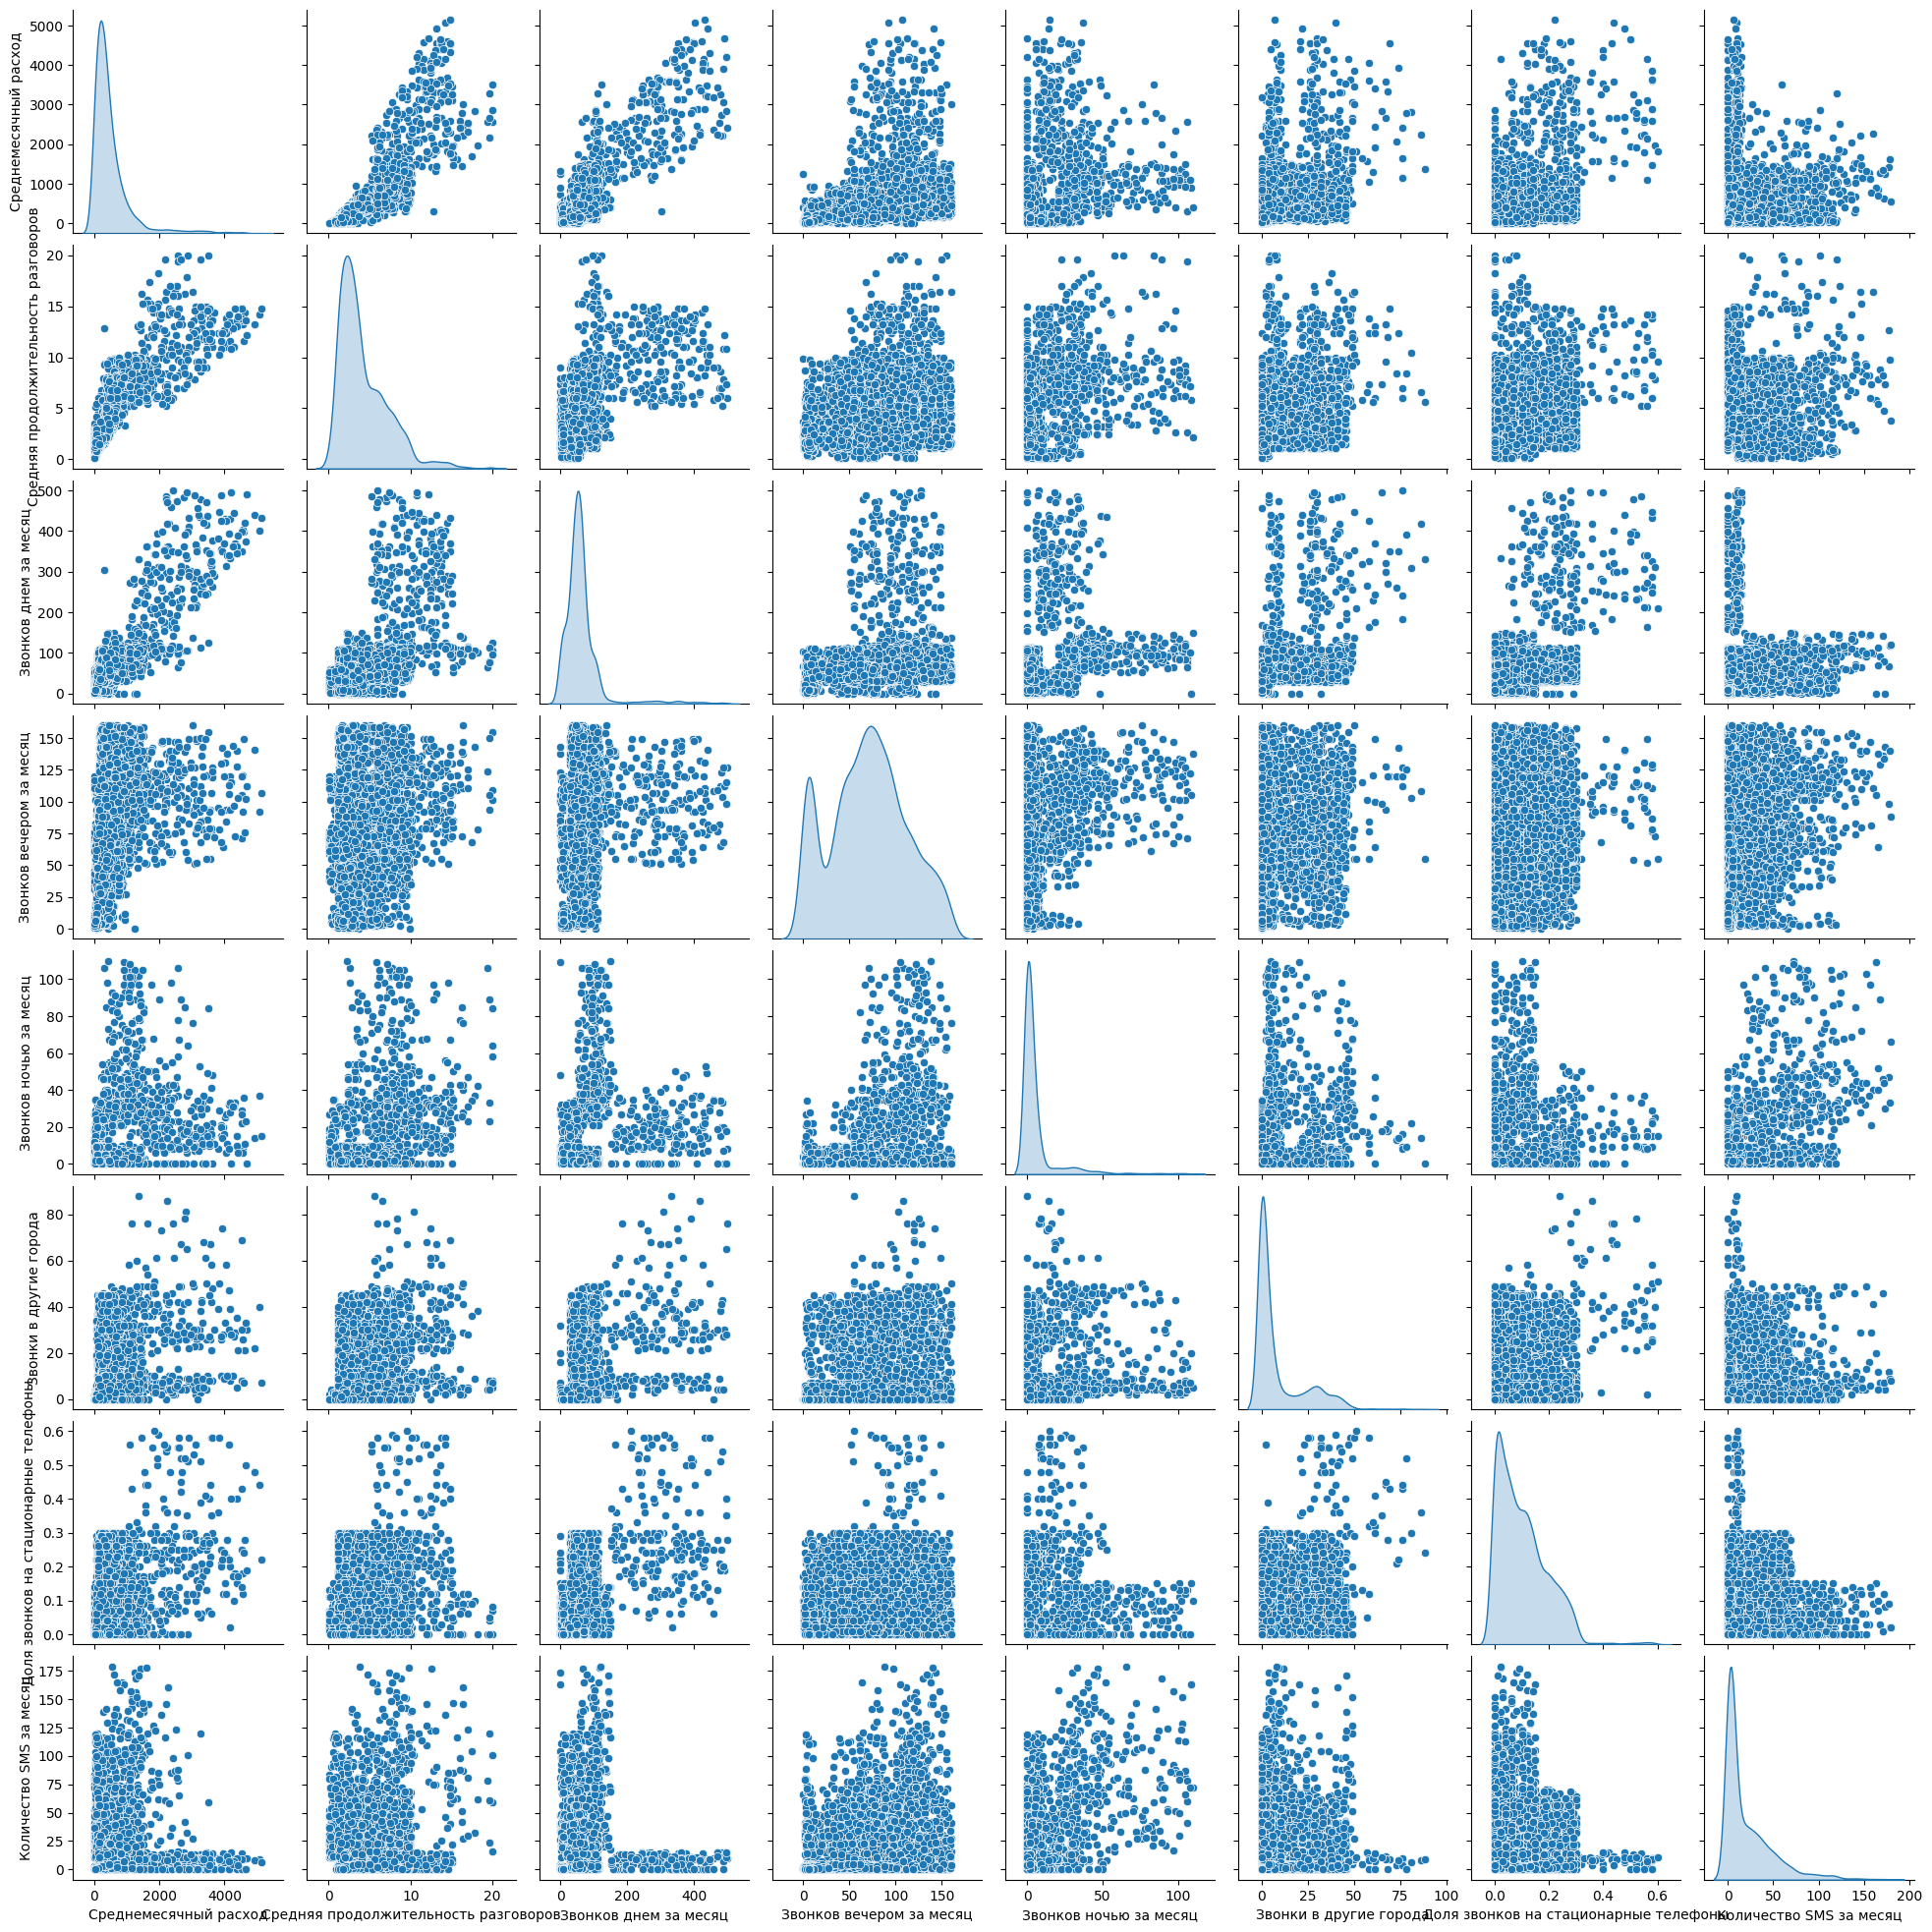

In [40]:
cols = [
    "Среднемесячный расход",
    "Средняя продолжительность разговоров",
    "Звонков днем за месяц",
    "Звонков вечером за месяц",
    "Звонков ночью за месяц",
    "Звонки в другие города",
    "Доля звонков на стационарные телефоны",
    "Количество SMS за месяц"
]

sns.pairplot(df[cols], diag_kind='kde')
plt.show()



*Среднемесячный расход*
Чётко растёт вместе:
со средней продолжительностью разговоров
с количеством дневных и вечерних звонков
Это логично: больше говоришь → дольше → дороже.

*Ночные звонки*
Связь с расходом слабее.
Есть клиенты с небольшими тратами, но относительно большим числом ночных звонков.
Вывод: ночные звонки либо дешевле, либо их просто меньше по длительности.

*Звонки в другие города / страны*
Есть положительная связь с расходом, но она размазанная.
Видно много клиентов с небольшими тратами и редкими междугородними звонками и небольшое количество тех, у кого и то и другое высокое.

*Доля звонков на стационарные телефоны*
Почти не коррелирует ни с чем.
Основная масса значений сосредоточена внизу.
Это слабый фактор, он почти не влияет на общий профиль расходов.

*SMS*
Слабая или умеренная связь с расходом.
Есть клиенты с большим количеством SMS, но средним расходом.
Значит SMS — это скорее стиль общения, а не основной источник затрат.
Распределения (диагональ)
Почти везде сильная асимметрия вправо:
много «обычных» клиентов
мало «тяжёлых», которые реально нагружают сеть


**ВЫВОД**

В ходе анализа данных об использовании услуг связи были выявлены различия в потребительском поведении пользователей в зависимости от их социальной категории. Установлено, что уровень среднемесячных расходов в первую очередь определяется продолжительностью разговоров и количеством звонков в дневное и вечернее время.  

Наибольшую активность и совокупные расходы демонстрируют бизнесмены и аспиранты, что может быть связано с высокой потребностью в коммуникациях и более гибким графиком общения. Для бизнесменов характерно большое количество звонков в другие города и страны, что отражает специфику их профессиональной деятельности.  

Студенты, напротив, показывают минимальные значения по большинству показателей: среднемесячному расходу, количеству и длительности звонков, а также объёму дополнительных услуг. Это позволяет выделить данную категорию как наименее затратную для оператора связи.  

Также было выявлено, что такие параметры, как доля звонков на стационарные телефоны, ночные звонки и количество SMS, оказывают меньшее влияние на общий уровень расходов и не являются ключевыми факторами формирования потребительского профиля.  

Таким образом, результаты анализа позволяют сделать вывод о том, что основную долю выручки оператору приносят пользователи с высокой разговорной активностью в стандартные часы, а социальная категория абонента может служить дополнительным признаком для сегментации и разработки тарифных предложений.